In [2]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as TF
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Custom Dataset
class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_names = sorted(os.listdir(image_dir))

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.image_names[idx])

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            image, mask = self.transform(image, mask)

        return image, mask


# Transformations
class SegmentationTransform:
    def __call__(self, image, mask):
        # Resize
        image = TF.resize(image, (256, 256))
        mask = TF.resize(mask, (256, 256), interpolation=Image.NEAREST)

        # To tensor
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)

        return image, mask


# U-Net Model
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        def conv_block(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_channels, out_channels, 3, padding=1),
                nn.ReLU(inplace=True),
            )

        self.down1 = conv_block(3, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.down2 = conv_block(64, 128)
        self.pool2 = nn.MaxPool2d(2)

        self.bridge = conv_block(128, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.up_block2 = conv_block(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.up_block1 = conv_block(128, 64)

        self.out = nn.Conv2d(64, 1, kernel_size=1)

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(self.pool1(d1))
        b = self.bridge(self.pool2(d2))
        u2 = self.up_block2(torch.cat([self.up2(b), d2], dim=1))
        u1 = self.up_block1(torch.cat([self.up1(u2), d1], dim=1))
        return torch.sigmoid(self.out(u1))


# Trainer
class UNetTrainer:
    def __init__(self, model, train_loader, device):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.device = device
        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(model.parameters(), lr=1e-4)

    def train(self, num_epochs=10):
        self.model.train()
        for epoch in range(num_epochs):
            epoch_loss = 0
            for images, masks in self.train_loader:
                images, masks = images.to(self.device), masks.to(self.device)
                outputs = self.model(images)
                loss = self.criterion(outputs, masks)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
                print(f"See")

            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(self.train_loader):.4f}")

class Evaluator:
    def __init__(self, model, dataloader, device):
        self.model = model.to(device)
        self.dataloader = dataloader
        self.device = device

    def evaluate(self):
        self.model.eval()
        dice_scores = []
        accuracies = []

        with torch.no_grad():
            for images, masks in self.dataloader:
                images = images.to(self.device)
                masks = masks.to(self.device)

                outputs = self.model(images)
                preds = (outputs > 0.5).float()

                dice = self.dice_score(preds, masks)
                acc = (preds == masks).float().mean().item()

                dice_scores.append(dice)
                accuracies.append(acc)

        avg_dice = sum(dice_scores) / len(dice_scores)
        avg_acc = sum(accuracies) / len(accuracies)
        print(f"Validation Accuracy: {avg_acc:.4f}, Dice Score: {avg_dice:.4f}")

    @staticmethod
    def dice_score(pred, target, epsilon=1e-6):
        intersection = (pred * target).sum()
        union = pred.sum() + target.sum()
        return (2. * intersection + epsilon) / (union + epsilon)

def predict_single_image(model, image_path, transform, device):
    model.eval()

    image = Image.open(image_path).convert("RGB")
    dummy_mask = Image.new("L", image.size)  # fake mask just for transform compatibility
    image_tensor, _ = transform(image, dummy_mask)
    image_tensor = image_tensor.unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image_tensor)
        pred_mask = (output > 0.5).float().squeeze().cpu().numpy()

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(pred_mask, cmap="gray")
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.tight_layout()
    plt.show()



In [7]:

image_dir = "/Users/chetan/Desktop/Spring 2025/CS231n/Project/Video-Segmentation-for-Autonomous-Manipulation/Data/Demo1/raw_images"
mask_dir = "/Users/chetan/Desktop/Spring 2025/CS231n/Project/Video-Segmentation-for-Autonomous-Manipulation/Data/Demo1/binary_masks"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = SegmentationTransform()
dataset = SegmentationDataset(image_dir, mask_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = UNet()
trainer = UNetTrainer(model, dataloader, device)
trainer.train(num_epochs=1)




See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See
See


KeyboardInterrupt: 

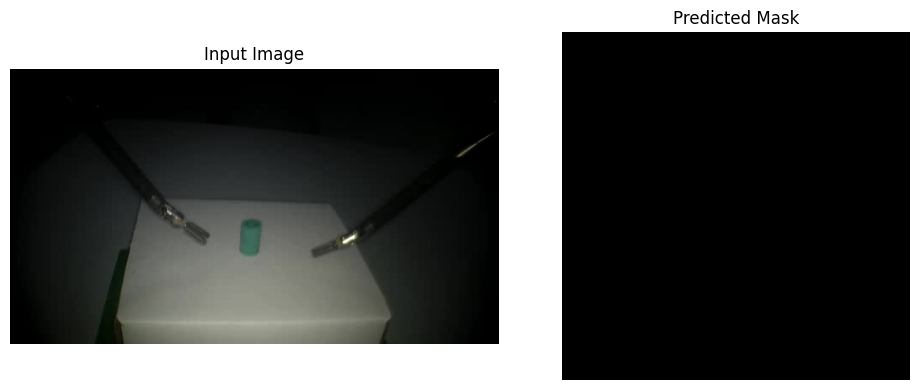

In [8]:
sample_image_path = "/Users/chetan/Desktop/Spring 2025/CS231n/Project/Video-Segmentation-for-Autonomous-Manipulation/Data/Demo1/raw_images/00000.jpg"
predict_single_image(model, sample_image_path, transform, device)